In [2]:
import numpy as np 
import base64, json, random
import matplotlib
import matplotlib.pyplot as plt
from cv2 import cv2 as cv

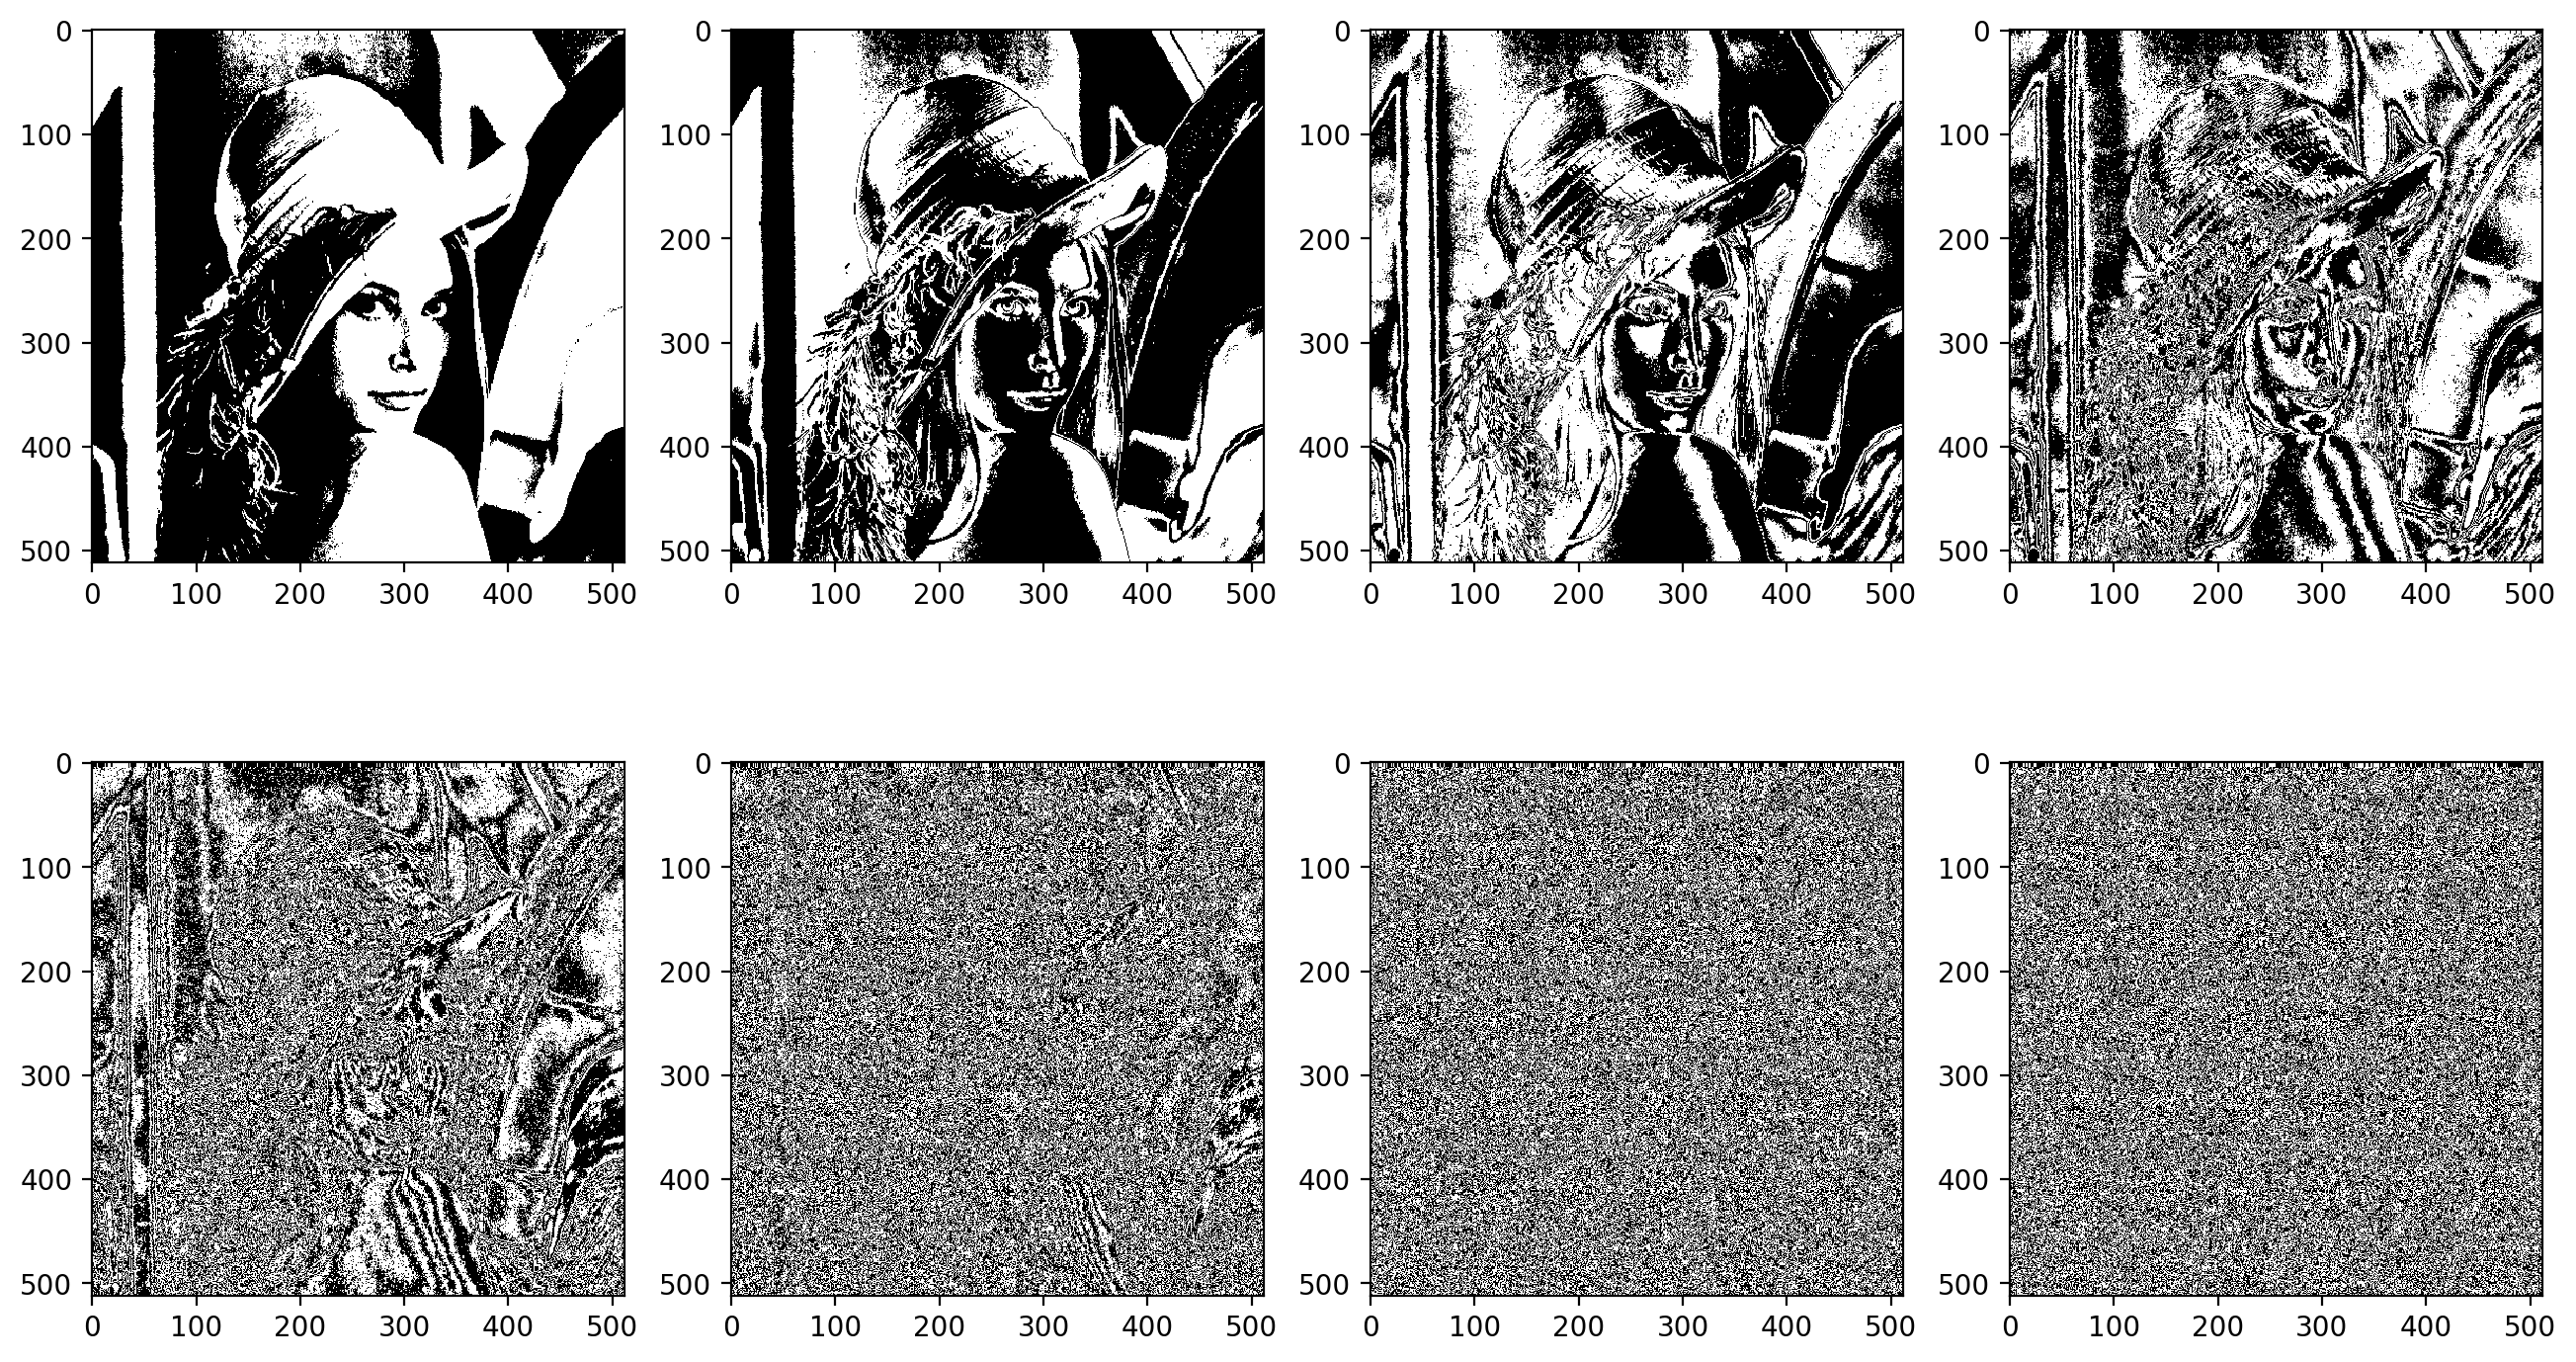

In [13]:
'''
bitplaneShow.py
'''
def myImgShow(windowName,img):
    cv.imshow(windowName,img) 
    while True:
        if cv.waitKey(100) == 27: 
    # waitkey指定100ms等待用户输入按键，这里设定等待用户按下ESC(ASCII的27）
            break
    # cv.waitKey(0)
    cv.destroyAllWindows()

def getBitPlane(img,bitPlane=1):
    '''
    读取灰度图位平面，默认读第一个位平面（二进制最低位所在平面）
    '''
    img = cv.imread(img,cv.IMREAD_UNCHANGED)
    imgCopy = img.copy()
    for row in range(imgCopy.shape[0]):
        for column in range(imgCopy.shape[1]):
            bit = bin(imgCopy[row][column])[2:]
            if len(bit) != 8: # 不足八位前面补0
                bit = '0'*(8 - len(bit)) + bit 
            if int(bit[8 - bitPlane]): # 取出位平面的值01，转换为二值图，1变成255
                imgCopy[row][column] = 255
            else:
                imgCopy[row][column] = 0
    return imgCopy

plt.figure(figsize=(16,9), dpi=200)
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.imshow(getBitPlane('./images/lena.bmp', bitPlane=9-i), cmap="gray")
plt.savefig('./img4readme/2.png')